# Problem: Implement Custom Loss Function (Huber Loss)

### Problem Statement
You are tasked with implementing the **Huber Loss** as a custom loss function in PyTorch. The Huber loss is a robust loss function used in regression tasks, less sensitive to outliers than Mean Squared Error (MSE). It transitions between L2 loss (squared error) and L1 loss (absolute error) based on a threshold parameter $ \delta $.

The Huber loss is mathematically defined as:
$$
L_{\delta}(y, \hat{y}) =
\begin{cases}
\frac{1}{2}(y - \hat{y})^2 & \text{for } |y - \hat{y}| \leq \delta, \\
\delta \cdot (|y - \hat{y}| - \frac{1}{2} \delta) & \text{for } |y - \hat{y}| > \delta,
\end{cases}
$$

where:
- $y$ is the true value,
- $\hat{y}$ is the predicted value,
- $\delta$ is a threshold parameter that controls the transition between L1 and L2 loss.

### Requirements
1. **Custom Loss Function**:
   - Implement a class `HuberLoss` inheriting from `torch.nn.Module`.
   - Define the `forward` method to compute the Huber loss as per the formula.

2. **Usage in a Regression Model**:
   - Integrate the custom loss function into a regression training pipeline.
   - Use it to compute and optimize the loss during model training.

### Constraints
- The implementation must handle both scalar and batch inputs for $ y $ (true values) and $ \hat{y} $ (predicted values).


Extra Details: https://en.wikipedia.org/wiki/Huber_loss

<details>
  <summary>💡 Hint</summary>
  Some details: https://www.kaggle.com/code/bigironsphere/loss-function-library-keras-pytorch/notebook
</details>

# My Solution


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Generate synthetic data
torch.manual_seed(42)
X = torch.rand(100, 1) * 10  # 100 data points between 0 and 10
y = 2 * X + 3 + torch.randn(100, 1)  # Linear relationship with noise

#TODO: Define the nn.Module for the Huber Loss
class HuberLoss(nn.Module):
    def __init__(self, delta = 2.0):
        '''
            Loss function with piece-wise properties. Transitioning to squared
            loss after certain threshold.
        '''
        super().__init__()
        self.delta = delta
        return
    def forward(self, y_pred, y_true) -> torch.Tensor:

        abs_dif = abs(y_pred - y_true)
        sq_points = [x for x in range(len(y_pred)) if abs_dif[x] > self.delta]
        loss = abs_dif * self.delta - 0.5 * self.delta ** 2
        loss[sq_points] = (abs_dif[sq_points] ** 2) * 0.5
        return loss.mean()

# Define the Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Single input and single output

    def forward(self, x):
        return self.linear(x)

# Initialize the model, loss function, and optimizer
model = LinearRegressionModel()
#TODO: Add the loss
criterion = HuberLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [100/1000], Loss: 0.2518
Epoch [200/1000], Loss: -0.1597
Epoch [300/1000], Loss: -0.3946
Epoch [400/1000], Loss: -0.5477
Epoch [500/1000], Loss: -0.6192
Epoch [600/1000], Loss: -0.6517
Epoch [700/1000], Loss: -0.6708
Epoch [800/1000], Loss: -0.6782
Epoch [900/1000], Loss: -0.6848
Epoch [1000/1000], Loss: -0.6892


In [ ]:
# Display the learned parameters
[w, b] = model.linear.parameters()
print(f"Learned weight: {w.item():.4f}, Learned bias: {b.item():.4f}")

# Testing on new data
X_test = torch.tensor([[4.0], [7.0]])
with torch.no_grad():
    predictions = model(X_test)
    print(f"Predictions for {X_test.tolist()}: {predictions.tolist()}")

Learned weight: 1.9751, Learned bias: 3.1885
Predictions for [[4.0], [7.0]]: [[11.089044570922852], [17.014455795288086]]


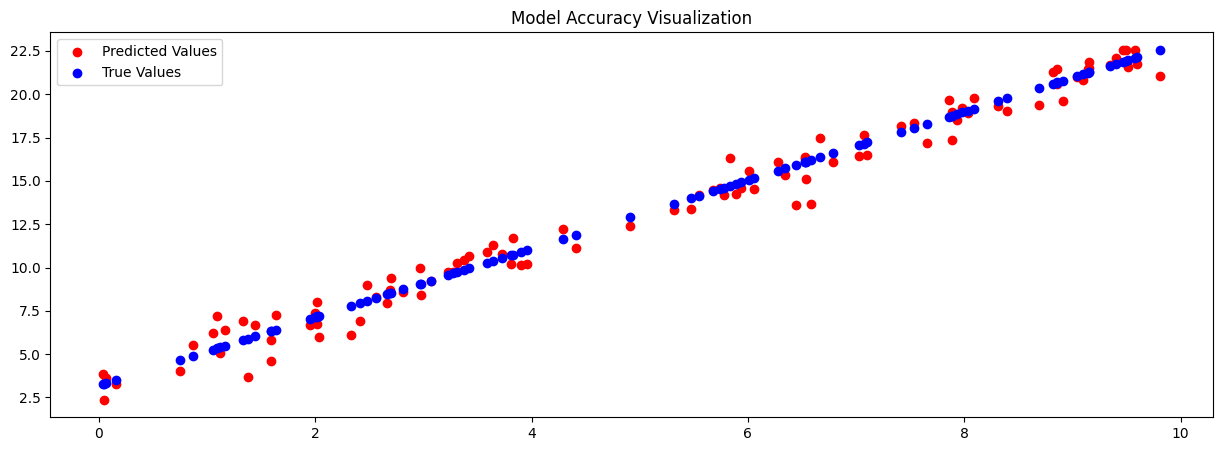

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.scatter(X, y, c = 'r', label = 'True Values')
plt.scatter(X, model(X).detach().numpy(), c = 'b', label = 'Predicted Values')
plt.title('Model Accuracy Visualization')
plt.legend(['Predicted Values', 'True Values'])
plt.show()